In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

from izhikevich import *
import powerlaw
import colorcet as cc
import holoviews as hv
hv.notebook_extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
runtime=10**6

In [23]:
# f, axarr = plt.subplots(1, 2, figsize=(15, 5))
fig = plt.figure()
colors = ['r', 'b', 'g', 'y']
names = ["Fully connected", "Watts-Strogatz", "Barabási-Albert", "Ageing"]
net_types = ['full', 'ws', 'barabasi', 'ageing']
distrs_types=[]
for c,net_type in enumerate(net_types):
    adj_mat, neg_nodes = create_network(size=50, neighbours=5,
                                        frac_neg=0.5, net_type=net_type)
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime)

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    distrs_types.append((ii, avalprobs[ii]))
#     y = np.bincount(np.array(aval_times))
#     ii = np.nonzero(y)[0]
#     avalprobs = y/len(aval_times)
#     axarr[1].loglog(ii, avalprobs[ii], colors[c] + 'o', label=names[c])
    


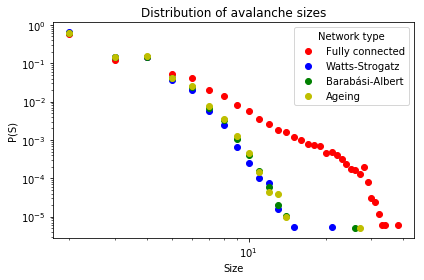

In [24]:
for c,dat in enumerate(distrs_types):
    plt.loglog(dat[0], dat[1], colors[c] + 'o', label=names[c])
plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title("Distribution of avalanche sizes")
plt.legend(title="Network type")

# axarr[1].set_xlabel("Duration")
# axarr[1].set_ylabel("P(D)")
# axarr[1].set_title("Distribution of avalanche durations")
# axarr[1].legend()
plt.tight_layout()
plt.show()

## Barabási neighbours

In [130]:
fig = plt.figure()
alpha_list = []
distrs_ns = []
neighs = [2, 5, 10, 15]
for j,c in enumerate(neighs):
    adj_mat, neg_nodes = create_network(size=50, neighbours=c, frac_neg=0., net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime)

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_ns.append((ii, avalprobs[ii]))


Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


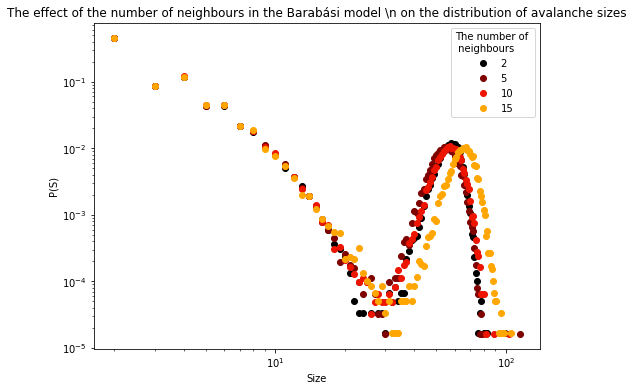

In [131]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_ns):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=neighs[j])

plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title("The effect of the number of neighbours in the Barabási model on the distribution of avalanche sizes")
plt.legend(title='The number of \n neighbours')
plt.show()

## Effect of parameter a

In [132]:
fig = plt.figure()
alpha_list = []
distrs_as = []
aas = [0.002, 0.005, 0.01, 0.02]
for j,c in enumerate(aas):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=0., net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, a_pars=(c, c))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_as.append((ii, avalprobs[ii]))


Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


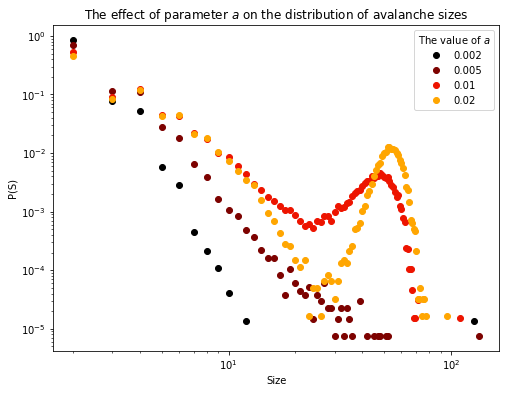

In [137]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_as):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=aas[j])

plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title(r"The effect of parameter $a$ on the distribution of avalanche sizes")
plt.legend(title=r"The value of $a$")
plt.show()

#### With inhibitory

In [134]:
fig = plt.figure()
alpha_list = []
distrs_as_inh = []
aas = [0.002, 0.005, 0.01, 0.02]
for j,c in enumerate(aas):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=0.5, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, a_pars=(c, c))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_as_inh.append((ii, avalprobs[ii]))


Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


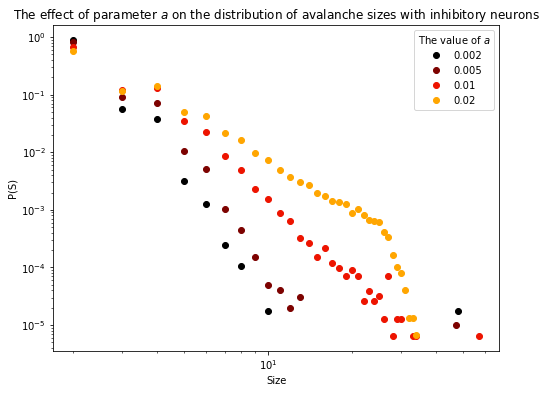

In [139]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_as_inh):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=aas[j])

plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title(r"The effect of parameter $a$ on the distribution of avalanche sizes with inhibitory neurons")
plt.legend(title=r"The value of $a$")
plt.show()

#### Excitatory neurons a

In [3]:
fig = plt.figure()
alpha_list = []
aas = [0.002, 0.005, 0.01, 0.02]
distrs_a1s=[]
for j,c in enumerate(aas):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=0.5, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, a_pars=(c, 0.02))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_a1s.append((ii, avalprobs[ii]))


Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


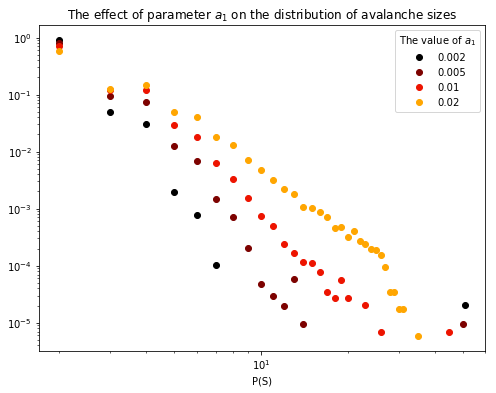

In [4]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_a1s):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=aas[j])

plt.xlabel("Size")
plt.xlabel("P(S)")
plt.title(r"The effect of parameter $a_1$ on the distribution of avalanche sizes")
plt.legend(title=r"The value of $a_1$")
plt.show()

#### Inhibitory neurons a

In [5]:
fig = plt.figure()
alpha_list = []
aas = [0.002, 0.005, 0.01, 0.02]
distrs_a2s=[]
for j,c in enumerate(aas):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=0.5, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, a_pars=(0.02, c))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_a2s.append((ii, avalprobs[ii]))


Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


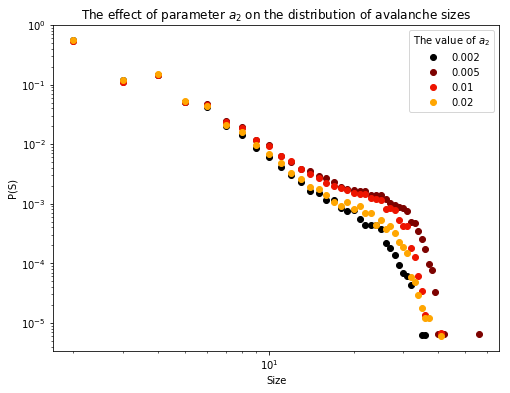

In [6]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_a2s):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=aas[j])
    
plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title(r"The effect of parameter $a_2$ on the distribution of avalanche sizes")
plt.legend(title=r"The value of $a_2$")
plt.show()

## Effect of parameter b

In [3]:
fig = plt.figure()
alpha_list = []
bs=np.linspace(0.16, 0.22, 4)
distrs_b=[]
for j,c in enumerate(bs):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=0., net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, b_pars=(c, c))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_b.append((ii, avalprobs[ii]))


Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


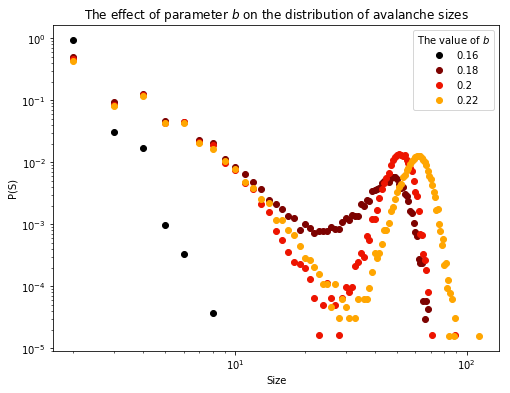

In [4]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_b):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=bs[j])

plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title(r"The effect of parameter $b$ on the distribution of avalanche sizes")
plt.legend(title=r"The value of $b$")
plt.show()

In [5]:
fig = plt.figure()
alpha_list = []
distrs_b_inh=[]
bs=np.linspace(0.16, 0.22, 4)
for j,c in enumerate(bs):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=0.5, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, b_pars=(c, c))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_b_inh.append((ii, avalprobs[ii]))

Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


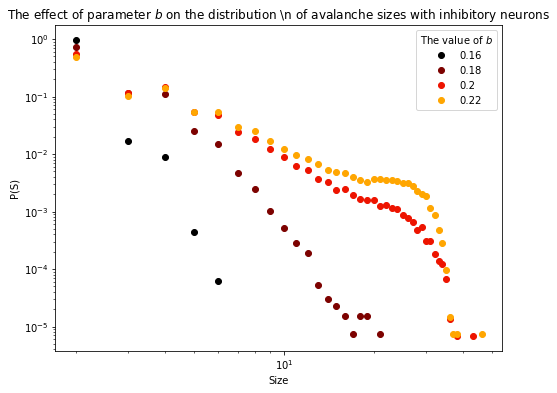

In [6]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_b_inh):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=bs[j])

plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title(r"The effect of parameter $b$ on the distribution \n of avalanche sizes with inhibitory neurons")
plt.legend(title=r"The value of $b$")
plt.show()

#### Excitatory neurons b

In [3]:
fig = plt.figure()
alpha_list = []
distrs_b1=[]
b1s=np.linspace(0.16, 0.22, 4)
for j,c in enumerate(b1s):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=0.5, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, b_pars=(c, .25))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_b1.append((ii, avalprobs[ii]))


Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


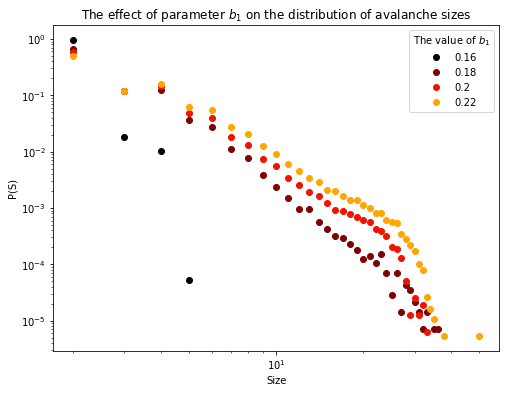

In [4]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_b1):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=b1s[j])

plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title(r"The effect of parameter $b_1$ on the distribution of avalanche sizes")
plt.legend(title=r"The value of $b_1$")
plt.show()

#### Inhibitory neurons b

In [5]:
fig = plt.figure()
alpha_list = []
distrs_b2=[]
b2s=np.linspace(0.21, 0.27, 4)
for j,c in enumerate(b2s):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=0.5, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, b_pars=(.2, c))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_b2.append((ii, avalprobs[ii]))


Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


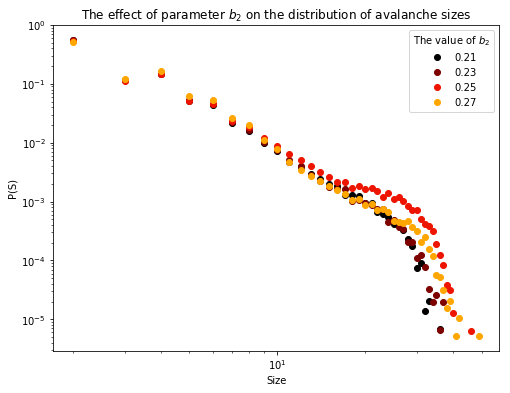

In [6]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_b2):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=b2s[j])
    
plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title(r"The effect of parameter $b_2$ on the distribution of avalanche sizes")
plt.legend(title=r"The value of $b_2$")
plt.show()

## Size

In [3]:
times = []
sizes = np.linspace(25, 100, 4)
alpha_list = []
distrs = []
for j,size in enumerate(sizes):
    start_t = time.time()
    adj_mat, neg_nodes = create_network(size=int(size), neighbours=2, frac_neg=0.5, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, a_pars=(0.005, 0.005))
    times.append(time.time()-start_t)
    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    distrs.append((ii, avalprobs[ii]))
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    

Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


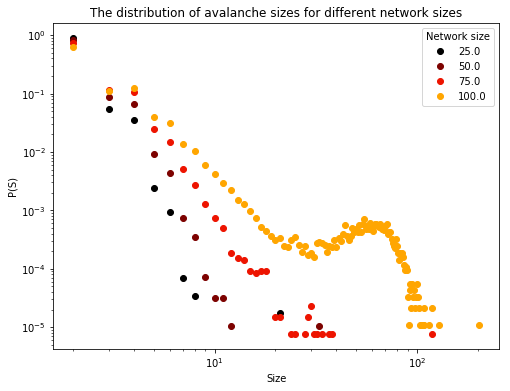

In [4]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=sizes[j])
    
plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title(r"The distribution of avalanche sizes for different network sizes")
plt.legend(title="Network size")
plt.show()

## Inhibition 

In [5]:
fig = plt.figure()
alpha_list = []
inp=np.linspace(0., .75, 4)
distrs_i = []
for j,c in enumerate(inp):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=c, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime, a_pars=(0.005, 0.005))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
    distrs_i.append((ii, avalprobs[ii]))

Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


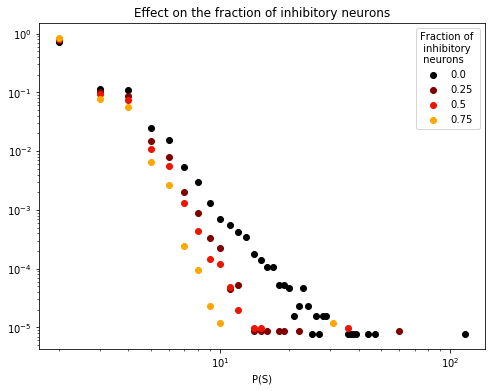

In [6]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(distrs_i):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=inp[j])

plt.xlabel("Size")
plt.xlabel("P(S)")
plt.title("Effect on the fraction of inhibitory neurons")
plt.legend(title="Fraction of \n inhibitory \n neurons")
plt.show()

In [45]:
inp=np.linspace(0., .75, 4)
avalprob_list = []
for j,c in enumerate(inp):
    adj_mat, neg_nodes = create_network(size=50, neighbours=5, frac_neg=c, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=runtime)

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    avalprob_list.append((ii, avalprobs[ii]))

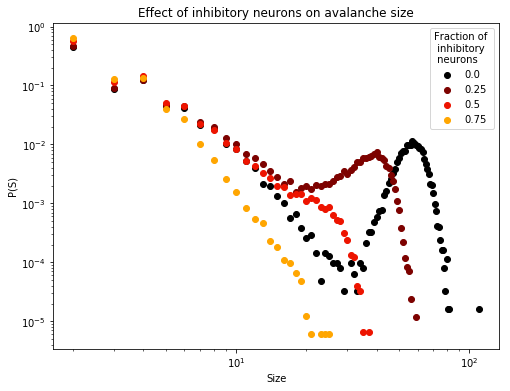

In [46]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(avalprob_list):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=inp[j])
plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title("Effect of inhibitory neurons on avalanche size")
plt.legend(title="Fraction of \n inhibitory \n neurons")
plt.show()

#### Barabási

In [47]:
inp=np.linspace(0., .75, 4)
bar_avalprob_list = []
for j,c in enumerate(inp):
    adj_mat, neg_nodes = create_network(size=50, neighbours=5, frac_neg=c, net_type='barabasi')
    all_act = izhikevich(adj_mat, neg_nodes, time=10**6)

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    bar_avalprob_list.append((ii, avalprobs[ii]))

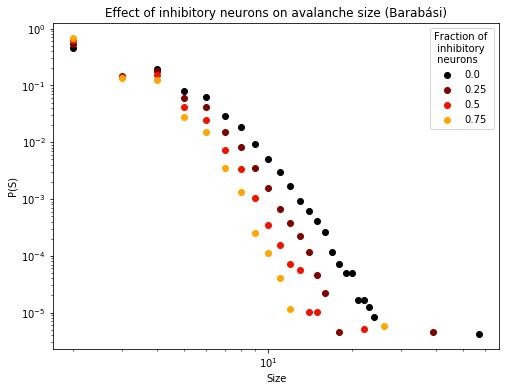

In [48]:
fig = plt.figure(figsize=(8, 6))
for j,dat in enumerate(bar_avalprob_list):
    plt.loglog(dat[0], dat[1], 'o', color=cc.palette["linear_kryw_0_100_c71"][int(j*64)], label=inp[j])
plt.xlabel("Size")
plt.ylabel("P(S)")
plt.title("Effect of inhibitory neurons on avalanche size (Barabási)")
plt.legend(title="Fraction of \n inhibitory \n neurons")
plt.show()